# Capstone Project - The Battle of the Neighborhoods
### *Indian Restaurant in New York*
<br>
<br>

## Table of contents
- Introduction
- Business Problem
- Data
- Methodology
- Analysis
- Results and Discussion
- Conclusion
<br>
<br>

## Introduction

New York City (NYC), often simply called New York, is the most populous city in the United States. With an estimated 2019 population of 8,336,817 distributed over about 302.6 square miles (784 km2), New York City is also the most densely populated major city in the United States. 
The restaurant industry is essential to New York City’s social and economic fabric. From small, family-owned restaurants and food carts to four-star world-famous establishments, the City abounds with restaurants that offer cuisines from every corner of the globe. Since March 2020, the restaurant industry has been hit very hard by the COVID-19 pandemic. Mandatory closures, stay-at-home and social distancing orders, the onset of a severe economic recession, and travel restrictions have resulted in unprecedented upheaval for the industry. Due to these situations the Indian population living in New York is neither able to get food from their culture nor they could travel back to their country. As part of this project we need to explore the best locations for Indian restaurant throughout the city of New York for the owner such that it could reach to the target customer and could have great success and consistent profit despite the pandemic situation. 
However, as with any business, opening a new restaurant will require serious considerations specifically due to pandemic situation.
<br>
<br>

## Business Problem 

The objective of this Capstone project is to analyze and select the best locations in the city of New York to open a new Indian restaurant. Using Data Science methodology and instruments such as Data Analysis and Visualization, this project aims to provide solutions to answer the business question: 
- Where in the city of New York, should the investor open an Indian Restaurant? 
- Which areas have large number of Indian Restaurant Market?
- Which all areas have a smaller number of Restaurants?
- Which areas have highest population of Indian customers?
- Which is the best place to stay if I prefer Indian Cuisine?
- What places are having best restaurant in New York?
<br>
<br>


## Data

To solve the problem, we will need the following data: 
- New York City data containing the neighborhoods and boroughs. 
- Latitude and longitude coordinates of those neighborhoods. This is required to plot the map and get the venue data. 
- Venue data, particularly data related to restaurants. We are going to use this data to perform further analysis of the neighborhoods.
<br>
<br>


## Methodology

New York City data containing the neighborhoods and boroughs will be obtained from the open data source: https://cocl.us/new_york_dataset. 
<br>Geographical coordinates of the neighborhoods (latitude and longitude) using Python Geocoder package. 
<br>We will use Foursquare API to get the venue data for the neighborhoods defined at the previous step.
<br>Data will be sorted based on rankings.
<br>Finally, the data will be visually assessed using graphing from Python libraries.
<br>This project will require using of many data science skills, from web scrapping (open source dataset), working with API (Foursquare), data cleaning, data wrangling, to map visualization (Folium). In the next Methodology section, we will discuss and describe any exploratory data analysis that we did, any inferential statistical testing that we performed, and what machine learning techniques were used.
<br>
<br>
<br>


## Analysis

### Import Required Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from bs4 import BeautifulSoup
import os

import json

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Foursquare Credentials

In [2]:
CLIENT_ID = 'AEAGHGCQKIIORFR1LAQTTQM3ECZXIPBULAB4E4VNUA3O4LCA' # your Foursquare ID
CLIENT_SECRET = 'T0LNHPRGMCIGE5CFDOETFE3OAYTI5WSGVE4QWIJC2CGBGG4M' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AEAGHGCQKIIORFR1LAQTTQM3ECZXIPBULAB4E4VNUA3O4LCA
CLIENT_SECRET:T0LNHPRGMCIGE5CFDOETFE3OAYTI5WSGVE4QWIJC2CGBGG4M


### Define Functions

#### Function to get latitude and longitude details.

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

#### Function to get venue for given latitude and longitude

In [4]:
def get_venues(lat,lng):
    #set variables
    radius=500
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Function to get venue details

In [5]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Function to get New York City data

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

### New York City Data

In [7]:
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
new_york_data.shape

(306, 4)

### Plotting New York City Neighborhood

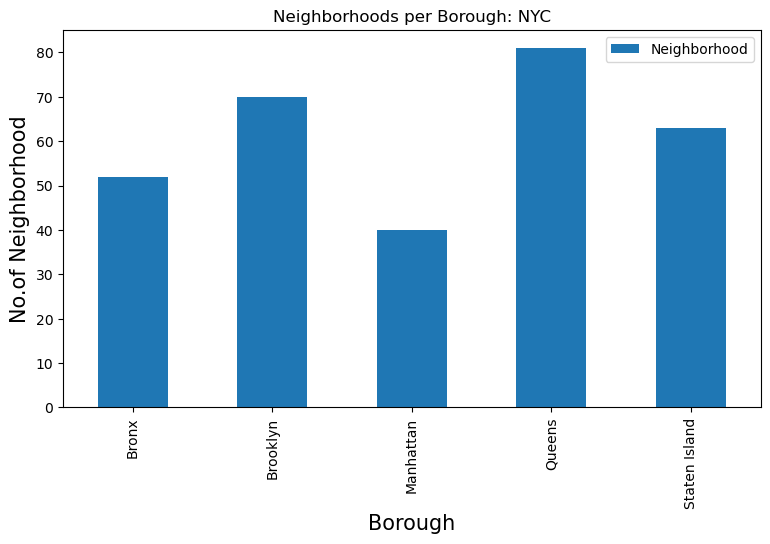

In [9]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Neighborhoods per Borough: NYC')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

#### Queens has highest number of neighborhoods

### Indian resturants for each Neighborhood

In [12]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_restaurants)))
    print(row)
    for resturant_detail in indian_restaurants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Restaurants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Restaurants in Norwood, Bronx:0
['Bronx', '

## Results and Discussions

### Analyze Indian Restaurants

In [13]:
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights


In [14]:
indian_rest_ny.shape

(61, 4)

We got 61 Indian Restaurants across the New York City.

### Indian Restaurants per Borough

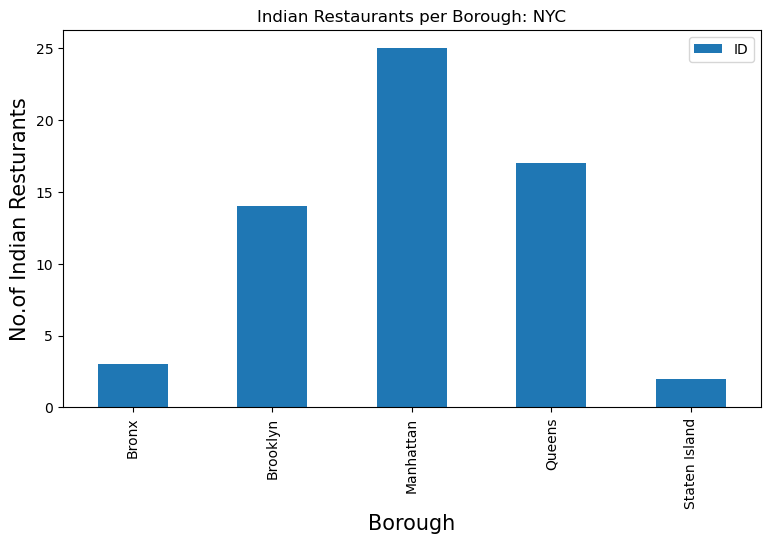

In [16]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Indian Restaurants per Borough: NYC')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

As per above graph we see that although Manhattan had the least number of neighborhoods, it does have the highest number of Indian restaurants.

### Indian Restaurants per Neighborhood

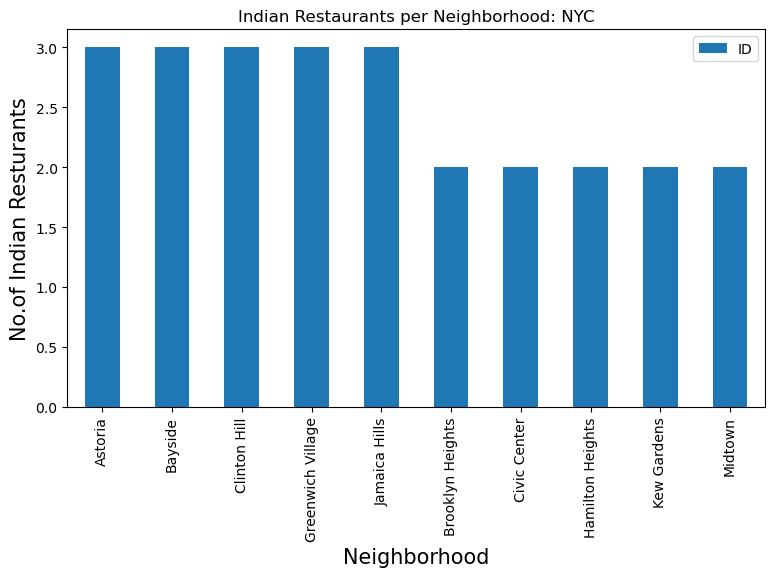

In [21]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Indian Restaurants per Neighborhood: NYC')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

As per the above graph Astoria, Bayside, Clinton Hill, Greenwich Village and Jamaica Hills have similar number of Indian Restaurants. Lets pick Greenwich Village for further analysis as it' in Manhattan Borough.

In [24]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Greenwich Village']

,Borough,Neighborhood,ID,Name
24,Manhattan,Greenwich Village,56c931b2cd10407d3ecbefda,Ananda
25,Manhattan,Greenwich Village,4593ed04f964a52050401fe3,The Kati Roll Company
26,Manhattan,Greenwich Village,4d992c1e942ba093ebb5968c,THELEwala


### Ranking of Indian restaurants

In [26]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
japanese_rest_stats_ny.head()

{'meta': {'code': 200, 'requestId': '60ae09bb90ba433918ba0dc3'}, 'response': {'venue': {'id': '4c0448d9310fc9b6bf1dc761', 'name': 'Curry Spot', 'contact': {'phone': '7187085900', 'formattedPhone': '(718) 708-5900'}, 'location': {'address': '4268 Katonah Ave', 'crossStreet': 'E 235 Street', 'lat': 40.897624941880906, 'lng': -73.86714729157393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.897624941880906, 'lng': -73.86714729157393}, {'label': 'entrance', 'lat': 40.897709, 'lng': -73.86707}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4268 Katonah Ave (E 235 Street)', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-spot/4c0448d9310fc9b6bf1dc761', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 

KeyError: 'venue'

In [27]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.4,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill,14,7.1,4
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal,35,6.9,19
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights,12,5.6,5


In [29]:
indian_rest_stats_ny.shape

(49, 7)

In [30]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [31]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.4,10
1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill,14,7.1,4
3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal,35,6.9,19
4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights,12,5.6,5


In [32]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       49 non-null     object 
 1   Neighborhood  49 non-null     object 
 2   ID            49 non-null     object 
 3   Name          49 non-null     object 
 4   Likes         49 non-null     object 
 5   Rating        49 non-null     float64
 6   Tips          49 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [33]:
#Convert Likes, Tips into float for further analysis

indian_rest_stats_ny['Likes'] = indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips'] = indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       49 non-null     object 
 1   Neighborhood  49 non-null     object 
 2   ID            49 non-null     object 
 3   Name          49 non-null     object 
 4   Likes         49 non-null     float64
 5   Rating        49 non-null     float64
 6   Tips          49 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [34]:
indian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,49.000000,49.000000,49.000000
mean,81.755102,7.383673,28.959184
std,157.861956,1.815024,48.816390
min,0.000000,0.000000,0.000000
25%,10.000000,7.100000,5.000000
50%,25.000000,7.800000,13.000000
75%,79.000000,8.500000,24.000000
max,834.000000,9.100000,256.000000


### Resturant with maximum Likes

In [35]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                              834.0
Rating                               8.7
Tips                               256.0
Name: 21, dtype: object

### Resturant with maximum Tips

In [36]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                              834.0
Rating                               8.7
Tips                               256.0
Name: 21, dtype: object

### Resturant with maximum Ratings

In [37]:
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                              602.0
Rating                               9.1
Tips                               152.0
Name: 27, dtype: object

### Neighborhoods and Borough with top average rating of Indian resturant

In [38]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
29,Tribeca,9.100000
25,Noho,8.800000
9,Chelsea,8.700000
17,Greenwich Village,8.666667
31,Upper West Side,8.600000
13,Fort Greene,8.600000
22,Midtown,8.550000
33,West Village,8.500000
0,Astoria,8.500000
24,New Dorp,8.300000


In [39]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.233333
1,Brooklyn,7.369231
3,Queens,6.871429
0,Bronx,6.650000
4,Staten Island,4.150000


### Plotting the results

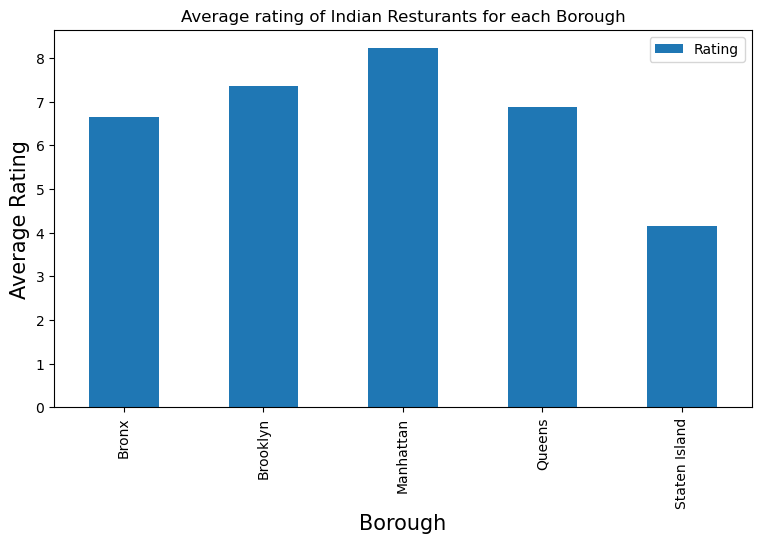

In [40]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Neighborhoods with average rating greater or equal 8.0

In [41]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,8.500000
7,Carnegie Hill,8.000000
9,Chelsea,8.700000
13,Fort Greene,8.600000
17,Greenwich Village,8.666667
22,Midtown,8.550000
24,New Dorp,8.300000
25,Noho,8.800000
26,Prospect Lefferts Gardens,8.100000
29,Tribeca,9.100000


### Add Latitude and Longitude

In [42]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.500000
1,Manhattan,Carnegie Hill,40.782683,-73.953256,8.000000
2,Manhattan,Chelsea,40.744035,-74.003116,8.700000
3,Staten Island,Chelsea,40.594726,-74.189560,8.700000
4,Brooklyn,Fort Greene,40.688527,-73.972906,8.600000
5,Manhattan,Greenwich Village,40.726933,-73.999914,8.666667
6,Manhattan,Midtown,40.754691,-73.981669,8.550000
7,Staten Island,New Dorp,40.572572,-74.116479,8.300000
8,Manhattan,Noho,40.723259,-73.988434,8.800000
9,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,8.100000


### Visualize on Map

In [43]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [44]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

## Conclusion

Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most number of Indian restaurants. Also, Manhattan has the best rated Indian restaurants on average. Staten Island has the least average rating for Indian Resturants. 
Astoria, Bayside, Clinton Hill, Greenwich Village and Jamaica Hills are the best neighborhoods for Indian restaurants. 
Based on the above information, I would state that Manhattan is best locations for Indian cuisine in NYC. To have the best shot of success, I would open an Indian restaurant in Manhattan as it has multiple neighborhoods with average ratings exceeding 8.0 and therefore it is the best place to stay if you prefer Indian Cuisine.
Finally, I would go to The Kati Roll Company in Manhattan for the best Indian food based on its likes and tips. 
As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.